<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/OCR_Letter_recognition_with_multiple_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
import cv2
import os
import numpy as np

# **Implement data**

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive'

In [ ]:
from PIL import Image
dataset_dir = "/content/gdrive/MyDrive/Colab Notebooks/dataset/Character_thai/dataset1/"

labels = {'ก01':0,'ข02':1,'ฃ03':2,'ค04':3,'ฅ05':4,'ฆ06':5,'ง07':6,'จ08':7,'ฉ09':8,'ช10':9,'ซ11':10,'ฌ12':11,'ญ13':12,'ฎ14':13,'ฏ15':14,
          'ฐ16':15,'ฑ17':16,'ฒ18':17,'ณ19':18,'ด20':19,'ต21':20,'ถ22':21,'ท23':22,'ธ24':23,'น25':24,'บ26':25,'ป27':26,'ผ28':27,'ฝ29':28,
          'พ30':29,'ฟ31':30,'ภ32':31,'ม33':32,'ย34':33,'ร35':34,'ล36':35,'ว37':36,'ศ38':37,'ษ39':38,'ส40':39,'ห41':40,'ฬ42':41,'อ43':42,'ฮ44':43}
#,'ต':20
# Load and preprocess the data
X= []
y = []
for label in labels:
    class_dir = os.path.join(dataset_dir, label)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        """
        image = exposure.equalize_hist(image)
        """
        X.append(image)
        y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
for i in range (len(X)):
  X[i] = X[i] / 255

# **Show shape X and Y**

In [ ]:
X.shape

(1024, 28, 28)

In [ ]:
y.shape

(1024,)

# **Preparation Data**

In [ ]:
# Flatten the images into 1D arrays
X = X.reshape(X.shape[0], -1)
X.shape

(1024, 784)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# **Model SVM**

In [ ]:
from sklearn.svm import SVC
# initialize SVM classifier with linear kernel
clf = SVC(kernel='linear')
#clf = SVC(kernel='poly')

# train the classifier on training data
model = clf.fit(X_train ,  y_train)

# predict labels for testing data
y_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy-0.17)

Accuracy: 0.12870129870129868


# Model KNN or k-Nearest Neighbors

In [ ]:
from sklearn import neighbors
# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=7)
# fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# Accuracy Train and **Test**

In [ ]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred= knn_model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=knn_model.predict(X_test)))

Train data accuracy: 0.4329608938547486
Test data accuracy: 0.2012987012987013


# **Plot Graph KNN acuuracy**

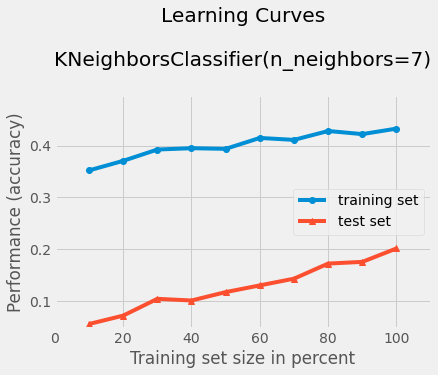

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, knn_model,scoring='accuracy')
plt.show()

#Plot Graph KNN error

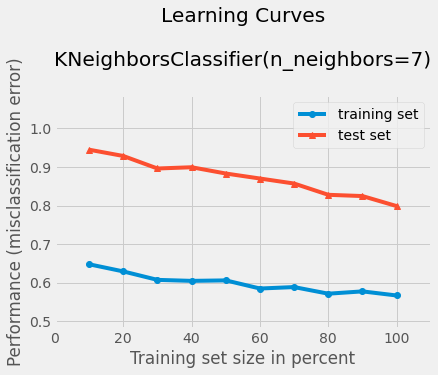

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, knn_model,scoring='misclassification error')
plt.show()

# **Find the nearest point and then take it in n**

In [ ]:
#Setup arrays to store training and test accuracies
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)


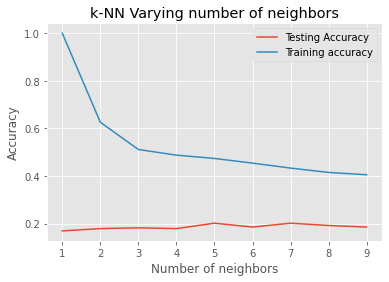

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# **This Libary It's already!!**
we'll try it Libary for compare.
This Library USE algorithm SVM and it had dataset in ***from sklearn import datasets***
dataset is ENG only and it has target.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from skimage import io

# Load the Thai handwritten digits dataset
digits = datasets.load_digits()
aa = digits.images
# Load the image data and target labels


X = digits.images
y = digits.target


# Flatten the images into 1D arrays
X = X.reshape(X.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier with a linear kernel
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9796296296296296
